# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [12]:
# Who are the customers of theses cars, what are their characteristics (age, income level, miles drives etc.)

In [ ]:
#What are the characteristics of the cars that sell the most, what drives the most demand? (Low mileage, SUV's, engine cylinders, etc.)

In [13]:
#Are there any outliers on price that indicate a car is a "good deal" or "over priced"?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

We are being tasked with understanding: What is in the cars dataset?
How complete is the data and are there duplicates within the dataset? 
Are there outliers present that we should be aware of?
Is there data the needs to be transformed in some way to complete our analysis? 

In [14]:
import pandas as pd
import numpy as np

In [15]:
cars = pd.read_csv('vehicles.csv')

In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [22]:
cars.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [17]:
#ID Missing values
(cars.isna().mean()*100).round(2).sort_values(ascending = False)

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
region           0.00
id               0.00
price            0.00
state            0.00
dtype: float64

In [19]:
#ID duplicates
cars.duplicated().sum()

np.int64(0)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [23]:
#Drop features that will not aid in creating predictive input
cars_clean = cars.drop({'id', 'VIN', 'region', 'model'}, axis=1)

cars_clean['type'] = cars_clean['type'].fillna('NA')
cars_clean['cylinders'] = cars_clean['cylinders'].fillna('NA')
cars_clean['condition'] = cars_clean['condition'].fillna('NA')
cars_clean['drive'] = cars_clean['drive'].fillna('NA')
cars_clean['paint_color'] = cars_clean['paint_color'].fillna('NA')
cars_clean['size'] = cars_clean['paint_color'].fillna('NA')
cars_clean['title_status'] = cars_clean['title_status'].fillna('NA')
cars_clean['transmission'] = cars_clean['transmission'].fillna('NA')
cars_clean['fuel'] = cars_clean['fuel'].fillna('NA')

#Remove rows that have missing manufacturer and year at the same time
cars_clean = cars_clean.dropna(subset=['manufacturer', 'year'], how='all')
#Remove rows that missing price
cars_clean = cars_clean[cars_clean['price'] != 0]

In [24]:
cars_clean.isna().mean() * 100

price           0.000000
year            0.001018
manufacturer    3.822655
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.566932
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [25]:
#drop missing values
cars_clean.dropna(inplace=True)
(cars_clean.isna().sum() / cars_clean.isna().count()) * 100.0

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [28]:
#duplicates:
cars_clean.duplicated().sum()

np.int64(112364)

In [30]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375619 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375619 non-null  int64  
 1   year          375619 non-null  float64
 2   manufacturer  375619 non-null  object 
 3   condition     375619 non-null  object 
 4   cylinders     375619 non-null  object 
 5   fuel          375619 non-null  object 
 6   odometer      375619 non-null  float64
 7   title_status  375619 non-null  object 
 8   transmission  375619 non-null  object 
 9   drive         375619 non-null  object 
 10  size          375619 non-null  object 
 11  type          375619 non-null  object 
 12  paint_color   375619 non-null  object 
 13  state         375619 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 43.0+ MB


In [34]:
cars_clean['year'] = cars_clean['year'].astype('int')
cars_clean['fuel'] = cars_clean['fuel'].astype('string')
cars_clean['odometer'] = cars_clean['odometer'].astype('int')
cars_clean['title_status'] = cars_clean['title_status'].astype('string')
cars_clean['transmission'] = cars_clean['transmission'].astype('string')
cars_clean['state'] = cars_clean['state'].astype('string')
cars_clean['state'] = cars_clean['state'].str.upper()

In [53]:
import pylab as plt
import seaborn as sns 

Text(0.5, 0.98, 'Price Skewed Right')

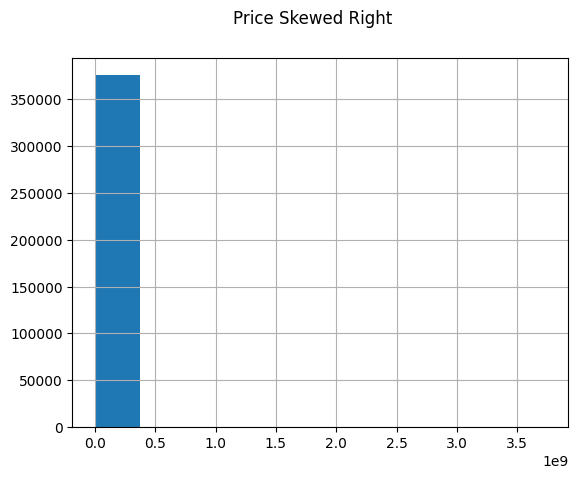

In [39]:
cars_clean['price'].hist()
pl.suptitle("Price Skewed Right")

In [40]:
# remove outliers...
std = cars_clean['price'].std() 
mean = cars_clean['price'].mean()
print(std, mean)
cars_clean[cars_clean['price']>150000].count()

12983816.664633201 83781.4214669652


price           136
year            136
manufacturer    136
condition       136
cylinders       136
fuel            136
odometer        136
title_status    136
transmission    136
drive           136
size            136
type            136
paint_color     136
state           136
dtype: int64

In [41]:
#STD is very high only 136 car above $150_000, so drop them
cars_clean = cars_clean[cars_clean['price']<=150000]

9.10654302129415 2011.2896456031299


Text(0.5, 0.98, 'Odometer skewed Right')

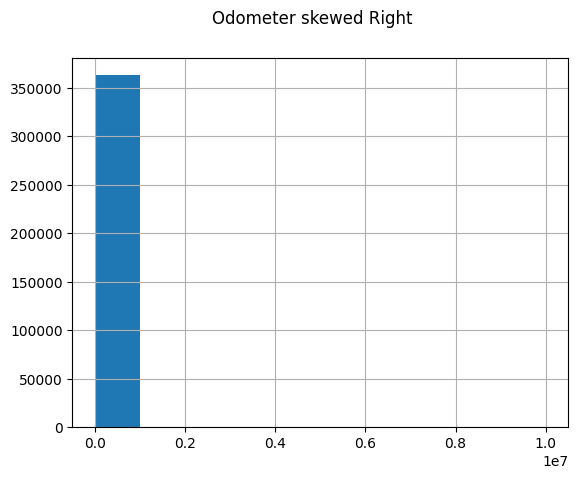

In [48]:
cars_clean['odometer'].hist()
pl.suptitle("Odometer skewed Right")

In [44]:
std = cars_clean['odometer'].std() 
mean = cars_clean['odometer'].mean()
print(std, mean)

136137.2714291146 95374.98032134373


In [49]:
#Remove Outliers
cars_clean = cars_clean[cars_clean['odometer']<= mean+2*std]

In [51]:
#Remove Outliers
std = cars_clean['year'].std() 
mean = cars_clean['year'].mean()
print(std, mean)
cars_clean = cars_clean[cars_clean['year']>= mean-2*std]
cars_clean = cars_clean[cars_clean['year']<= mean+2*std]

4.750253927847207 2013.1795298378781


Text(0.5, 1.0, 'Price: Right-Skewed after Outlier Removal')

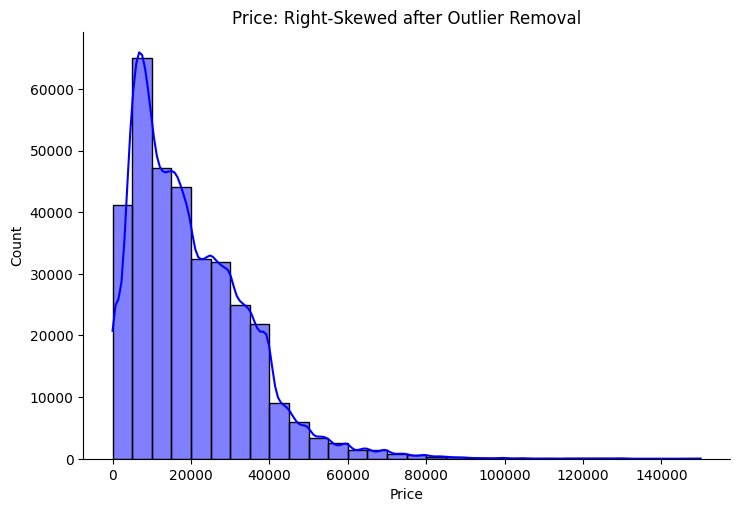

In [66]:
sns.displot(cars_clean['price'], bins=30, color='blue', kde=True, height=5, aspect=1.5)
plt.xlabel("Price")
plt.title("Price: Right-Skewed after Outlier Removal")

Text(0.5, 1.0, 'Year: Left-Skewed after Outlier Removal')

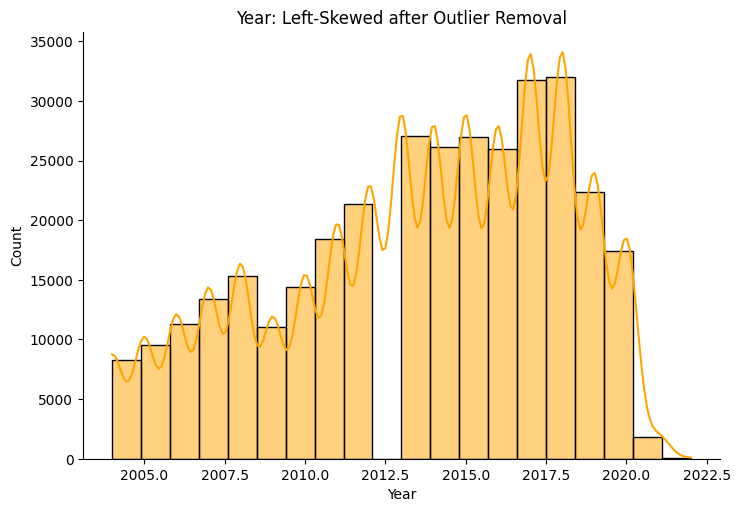

In [68]:
sns.displot(cars_clean['year'],bins=20,color='Orange', kde=True, height=5, aspect=1.5)
plt.xlabel("Year")
plt.title("Year: Left-Skewed after Outlier Removal")

Text(0.5, 1.0, 'Odometer: Right-Skewed after Outlier Removal')

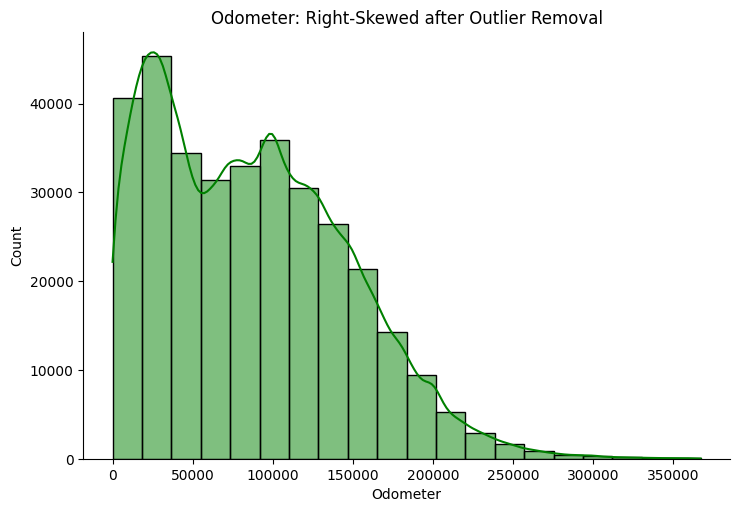

In [69]:
sns.displot(cars_clean['odometer'],bins=20,color='Green', kde=True, height=5, aspect=1.5)
plt.xlabel("Odometer")
plt.title("Odometer: Right-Skewed after Outlier Removal")

In [70]:
cars_clean.describe()

,price,year,odometer
count,334595.000000,334595.000000,334595.000000
mean,19940.307351,2013.548451,87167.702643
std,14645.158187,4.391728,59212.219262
min,1.000000,2004.000000,0.000000
25%,8495.000000,2011.000000,35510.000000
50%,16988.000000,2014.000000,81878.000000
75%,28900.000000,2017.000000,128343.000000
max,150000.000000,2022.000000,367245.000000


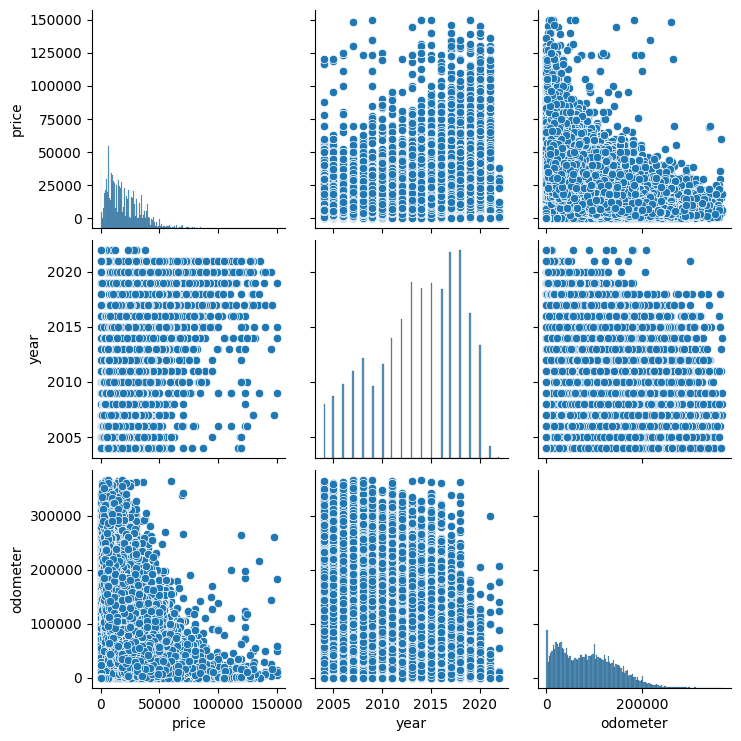

In [73]:
sns.pairplot(cars_clean)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import plotly.express as px
import warnings


def root_mean_squared_error (y_actual, y_predicted, sq=False):
    return mean_squared_error(y_actual, y_predicted, squared=sq)

In [74]:
X = cars_clean.drop('price', axis = 1)

#drop all categorical columns to get base line error
X = X.drop(['manufacturer', 'fuel','title_status','transmission','state', 'condition', 'drive', 'type', 'cylinders', 
            'paint_color', 'size'], axis=1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [75]:
pipeline = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipeline

Pipeline(steps=[('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [77]:
pipeline.fit(X_train, y_train)

preds_train = pipeline.predict(X_train)
preds_test = pipeline.predict(X_test)

base_train_mse = root_mean_squared_error(y_train, preds_train)
base_test_mse = root_mean_squared_error(y_test, preds_test)

C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
print('Baseline Train LinReg RMSE: ', base_train_mse)
print('Baseline Test LinReg RMSE:  ', base_test_mse)

Baseline Train LinReg RMSE:  12105.39879801783
Baseline Test LinReg RMSE:   12202.97914627854


In [80]:
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer', 'fuel','title_status',
                                                                               'transmission','state', 'condition', 
                                                                               'drive', 'type', 'cylinders', 'paint_color', 
                                                                               'size']), 
                                          remainder='passthrough')


pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                #('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', Lasso(alpha=0.5, tol=1e-2))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Lasso(alpha=0.5, tol=0.01))])

In [82]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

pipe.fit(X_train, y_train)

lasso_preds_train = pipe.predict(X_train)
lasso_preds_test = pipe.predict(X_test)

lasso_train_mse = root_mean_squared_error(y_train, lasso_preds_train)
lasso_test_mse = root_mean_squared_error(y_test, lasso_preds_test)

print('Train Lasso RMSE: ', lasso_train_mse)
print('Test Lasso RMSE:  ', lasso_test_mse)

Train Lasso RMSE:  9001.23709292771
Test Lasso RMSE:   8996.31336467898


C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [83]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Ridge(alpha=0.5))])

pipe

C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.5))])

In [85]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

pipe.fit(X_train, y_train)

ridge_preds_train = pipe.predict(X_train)
ridge_preds_test = pipe.predict(X_test)

ridge_train_mse = root_mean_squared_error(y_train, ridge_preds_train)
ridge_test_mse = root_mean_squared_error(y_test, ridge_preds_test)

print('Train Ridge RMSE: ', ridge_train_mse)
print('Test Ridge RMSE:  ', ridge_test_mse)

Train Ridge RMSE:  8995.244361267125
Test Ridge RMSE:   8989.73463075957


C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [88]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

pipe.fit(X_train, y_train)

linreg_preds_train = pipe.predict(X_train)
linreg_preds_test = pipe.predict(X_test)

linreg_train_mse = root_mean_squared_error(y_train, linreg_preds_train)
linreg_test_mse = root_mean_squared_error(y_test, linreg_preds_test)

print('Train LinReg RMSE: ', linreg_train_mse)
print('Test LinReg RMSE:  ', linreg_test_mse)

Train LinReg RMSE:  9007.2139599113
Test LinReg RMSE:   9002.65871601609


C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
df = X_train.drop(['year', 'manufacturer', 'condition', 'fuel', 'odometer', 'title_status','transmission', 'drive', 'size', 
                       'type', 'paint_color', 'state', 'cylinders'], axis=1)
df['price'] = y_train
df['Lasso'] = lasso_preds_train
df['Ridge'] = ridge_preds_train
df['LinReg'] = linreg_preds_train

In [94]:
df.sort_index()[3000:3100].plot(kind='line', backend='plotly')
df = pd.DataFrame()
df['price'] = y_test
df['Lasso'] = ridge_preds_test
df['Ridge'] = ridge_preds_test
df['LinReg'] = linreg_preds_test

In [95]:
df.head()

,price,Lasso,Ridge,LinReg
82889,6950,9398.717010,9398.717010,9416.383212
166212,29784,28458.278528,28458.278528,28383.066293
233429,9220,7460.507447,7460.507447,7493.662272
231631,19389,22780.250397,22780.250397,22631.904441
313309,515,32267.287849,32267.287849,32333.232288


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [96]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=10)),
                ('model', LinearRegression())])

pipe

C:\Users\C308440\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('model', LinearRegression())])

In [ ]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

pipe.fit(X_train, y_train)

feat_preds_train = pipe.predict(X_train)
feat_preds_test = pipe.predict(X_test)

feat_train_mse = root_mean_squared_error(y_train, feat_preds_train)
feat_test_mse = root_mean_squared_error(y_test, feat_preds_test)

print('Train LinReg Best 4 Features RMSE: ', feat_train_mse)
print('Test LinReg Best 4 Features RMSE:  ', feat_test_mse)

In [101]:
features = pipe.named_steps['col_transformer'].get_feature_names_out()
sel_features = pipe.named_steps['selector'].get_feature_names_out()
indexes = []
for s in sel_features:
    indexes.append(int(s[1:]))

features[indexes]

array(['onehotencoder__fuel_diesel', 'onehotencoder__title_status_clean',
       'onehotencoder__drive_4wd', 'onehotencoder__drive_fwd',
       'onehotencoder__type_pickup', 'onehotencoder__type_truck',
       'onehotencoder__cylinders_4 cylinders',
       'onehotencoder__cylinders_8 cylinders', 'remainder__year',
       'remainder__odometer'], dtype=object)

In [ ]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', LinearRegression())])

pipe

In [ ]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

param_dict = {'selector__n_features_to_select': [4, 5, 6, 7, 8, 9, 10]}
             
mygrid = GridSearchCV(estimator = pipe, param_grid=param_dict)
mygrid.fit(X_train,y_train)

grid_preds_train = mygrid.predict(X_train)
grid_preds_test = mygrid.predict(X_test)

grid_train_mse = root_mean_squared_error(y_train, grid_preds_train)
grid_test_mse = root_mean_squared_error(y_test, grid_preds_test)

print('Train GridSearch RMSE: ', grid_train_mse)
print('Test GridSearch RMSE:  ', grid_test_mse)

In [ ]:
best_selector = mygrid.best_estimator_.named_steps['selector']
best_selector.get_support()
pipe.named_steps['col_transformer'].get_feature_names_out()[best_selector.get_support()]

In [ ]:
mygrid.best_estimator_

In [ ]:
mygrid.best_estimator_.named_steps['model'].coef_

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
#See Documentation in the Word Document Attached to this Project "UC Berkeley Cert. - Prompt 2 Model Report"